#HOA 7.1

In this set of activities, we will practice with cryptography, and then see another example of using a Pytyon dictionary for fast membership testing. 

---

##1. Oh, Railly?

In this activity, we will practice a bit more with the rail fence cipher, by writing a rail fence encryption function that can work with an arbitrary number of rails.


---
###1.1 Figure out how to map plaintext to rails

Consider this image, which again shows how plaintext is mapped on to the rails in a three-rail cipher. 

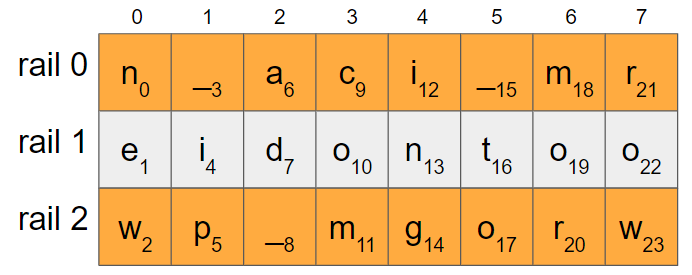

In this image, the subscripts represent the location of each of the characters in the plaintext. Before you continue on with the coding below, first determine an expression that gives the subscript, based on the rail number, column, and number of rails.  In the decryption algorithm, that expression is `col + (rail * railLen)`; your new expression will likely be similar.

---

###1.2 Write the `railEncrypt()` function

Once you have that expression figured out, complete the `railEncrypt()` function in the cell below. 

In [1]:
def railEncrypt(plaintext, numRails):
  """
  Encrypt plaintext using a rail fence cipher.

  parameters
  ----------
  plaintext : str
    The text to encrypt
  numRails : str
    Number of rails to use, in [2, len(plaintext)]; should evenly divide len(plaintext)

  returns
  -------
    Ciphertext, based on the plaintext and number of rails. 
  """

  ciphertext = ''

  railLen = len(plaintext) // numRails

  # TODO: write nested for loops here to turn the plaintext into ciphertext,
  # given the specified number of rails
  for rail in range(numRails):
    for column in range(railLen):
      ciphertext = ciphertext + plaintext[rail + column * numRails]

  return ciphertext

---

###1.3 Test the `railEncrypt()` function

Once you've finished your version of the `railEncrypt()` function, execute the cell below to test your work. If you see "AWESOME" at the end, you code passed all of the tests - congratulations! 

If you see other feedback, no worries. See if you can tell why your code isn't working, fix it, and re-run the tests. 

In [2]:
def railDecrypt(cipherText, numRails):
  """Decrypt a message encrypted with the rail-fence cipher.

  cipherText - the encrypted message
  numRails - number of rails used to encrypt the plaintext
  """
  railLen = len(cipherText) // numRails
  solution = ''
  for col in range(railLen):
    for rail in range(numRails):
      nextLetter = col + (rail * railLen)
      solution = solution + cipherText[nextLetter]
  return solution.split()


# test cases with plaintext, ciphertext, and number of rails
testData = [('new ipad coming tomorrow','n aci mreidontoowp mgorw',3),
            ('Once you know all the elements its not difficult to pull together a sentence','O  wleettoic p ersenyk   msstfututt enconatee   flolohanceuolhlnindit lge te',4),
            ('Of all the places to travel Mexico is at the top of my list for sure','O   ftim osya   ltallrti a stvttheh elef   opMtrleo axpsci uecorsofe', 17),
            ('Did you know that along with gorgeous architecture its home to the largest tamale','Dnahsc tsiol  thhtdwogauoe   norrm tytgrceelaoh gh  amuaweiitra tiottoglk tues ee',9)]

caseNum = 1
numPassed = 0
for (plaintext, ciphertext, numRails) in testData:
  print('test case {0:d}:'.format(caseNum))
  print('\tPlaintext: {0:s}'.format(plaintext))
  print('\tExpected ciphertext: {0:s}'.format(ciphertext))

  received = railEncrypt(plaintext, numRails)

  print('\tReceived ciphertext: {0:s}'.format(received))

  if ciphertext == received:
    print('\tCHECK')
    numPassed += 1
  else:
    print('\tINCORRECT. CHECK CODE AND TRY AGAIN')

  caseNum += 1

if numPassed == len(testData):
  print('AWESOME')

test case 1:
	Plaintext: new ipad coming tomorrow
	Expected ciphertext: n aci mreidontoowp mgorw
	Received ciphertext: n aci mreidontoowp mgorw
	CHECK
test case 2:
	Plaintext: Once you know all the elements its not difficult to pull together a sentence
	Expected ciphertext: O  wleettoic p ersenyk   msstfututt enconatee   flolohanceuolhlnindit lge te
	Received ciphertext: O  wleettoic p ersenyk   msstfututt enconatee   flolohanceuolhlnindit lge te
	CHECK
test case 3:
	Plaintext: Of all the places to travel Mexico is at the top of my list for sure
	Expected ciphertext: O   ftim osya   ltallrti a stvttheh elef   opMtrleo axpsci uecorsofe
	Received ciphertext: O   ftim osya   ltallrti a stvttheh elef   opMtrleo axpsci uecorsofe
	CHECK
test case 4:
	Plaintext: Did you know that along with gorgeous architecture its home to the largest tamale
	Expected ciphertext: Dnahsc tsiol  thhtdwogauoe   norrm tytgrceelaoh gh  amuaweiitra tiottoglk tues ee
	Received ciphertext: Dnahsc tsiol  thhtdwogauoe

---

##2. Zip it!

Now, let's return to the idea of using a Python dictionary for rapid membership testing, which was introduced in Section 8.3.1 of your text. 

In this example, we are given two files: `zips.txt`, which is a list of all the valid ZIP codes in the United States, and `students.csv`, which is a list of students and their self-reported ZIP codes. We *think* there are some students with invalid ZIP codes, and we're going to use Python code to determine if that is true.

---

###2.1 Build the ZIP Dictionary

First, read the `zips.txt` file, and place the ZIP codes into a Python dictionary named `zips`. Your code will look a lot like Listing 8.1 of the text. 

The `zips.txt` file looks like this:

```
.
.
.
46128
46130
46131
46133
.
.
.
```

I.e., it has one valid ZIP code per line. 

In [3]:
def createZipDict(fileName):
  """
  Read a zipcode file into a dictionary.

  parameters
  ----------
  fileName : str
    Filename of file containing zip codes, one per line

  returns
  -------
    A dictionary of strings, with the zip codes as keys
  """
  # TODO: finish this function; don't forget to remove the '\n' 
  # from the end of each ZIP
  zips = { }
  with open(fileName, 'r') as inFile:
    for line in inFile:
      zips[line[:-1]] = True

  return zips

# this statment will execute your createZipDict() function
zips = createZipDict('zips.txt')

---

###2.2 Build the Student List

Now, read the contents of the `students.csv` file into a list named `stduents`. 

The `students.txt` file looks like this:

```
.
.
.
Wilhelmina,27587
Colleen,81001
Dagny,07016
Felix,49441
.
.
.
```

You will probably want to use the `csv` module, in a manner similar to that covered in Section 5.3.1 of your text. 

The `students` list you create should be a list of tuples, like this:

```
[... ('Wilhelmina', '27587'), ('Colleen', '81001'), ('Dagny', '07016'), ('Felix', '49441'), ... ]
```

In [4]:
# TODO: read students.csv and make a list of students, as 
# (name, zip) tuples
import csv

students = []

with open('students.csv', 'r') as inFile:
  csvReader = csv.reader(inFile)
  metadata = next(csvReader)
  for line in csvReader:
    students.append((line[0], line[1]))

  print(students)

[('Randee', '08053'), ('Ming', '11729'), ('Shelia', '34608'), ('Rena', '27526'), ('Shani', '16101'), ('Malena', '55343'), ('Lavonna', '39180'), ('Clelia', '17331'), ('Rona', '70663'), ('Jolynn', '49418'), ('Chere', '32746'), ('Cecily', '30274'), ('Soo', '01085'), ('Deann', '12590'), ('Jaquelyn', '20772'), ('Judy', '35758'), ('Kimiko', '49423'), ('Felicita', '51501'), ('Maris', '18102'), ('Melody', '49221'), ('Bonnie', '02169'), ('Tommy', '11417'), ('Nana', '11414'), ('Bernardina', '55912'), ('Henry', '30180'), ('Nerissa', '21208'), ('Sang', '29063'), ('Franklyn', '33510'), ('Birgit', '48042'), ('Nila', '60068'), ('Ahmed', '90278'), ('Lilia', '49426'), ('Rolanda', '12203'), ('Clemente', '76901'), ('Cathie', '01906'), ('Kristin', '08865'), ('Audrea', '11756'), ('Donella', '23860'), ('Alexa', '50501'), ('Adrien', '12553'), ('Crissy', '19446'), ('Pete', '54601'), ('Sunni', '84010'), ('Shaunda', '01803'), ('Ike', '34608'), ('Zella', '43062'), ('Euna', '38671'), ('Zachery', '29445'), ('Forre

---

###2.3 Find the Invalid ZIP Codes

Now, use list comprehension to build a list of all the `(name, zip)` tuples in `students` that have invalid ZIP codes, and print the contents of that list.

*Note*: using list comprehension means you should not use a `for` loop. Refer to Section 5.3.3 of the text to remind yourself how it works. 

In [6]:
# TODO: use list comprehension to get a list of (name, zip) tuples that have invalid ZIP codes
invalids = [x for x in students if x[1] not in zips]
print(invalids)

[('Robert', '00743'), ('Shirely', '99999'), ('Elvis', '00000')]
